## Behavioral Risk Factor Surveillance System

#### Installing Dependencies

In [6]:
# Installing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.io as pio
import os
# Importing so that plotly works offline
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plt.style.use('ggplot')

from functools import reduce
from scipy import stats

# Setting up so that the figures show up in the notebook:
init_notebook_mode(connected=True) 

#### Reading the CSV into a DataFrame.

In [7]:
%%time
# reading the csv into a dataframe
file_path = "./Resources/behavioral_revised_data_final.csv"
behavior_data = pd.read_csv(file_path)

# Verifying Image directory to store images
if not os.path.exists('Images'):
    os.mkdir('Images')

Wall time: 169 ms


#### Finding any Correlation among features.

In [8]:
corr_table = behavior_data.corr()
corr_table

,Weight(lbs),Height(ft),Vegetables/Day,Fruits/Day,Physical Activity/Day(mints),Alcohol/Day
Weight(lbs),1.000000,0.543545,-0.092949,-0.079872,-0.043625,0.134069
Height(ft),0.543545,1.000000,-0.077631,-0.046853,0.020995,0.162509
Vegetables/Day,-0.092949,-0.077631,1.000000,0.372376,0.051116,-0.065677
Fruits/Day,-0.079872,-0.046853,0.372376,1.000000,0.050804,-0.085544
Physical Activity/Day(mints),-0.043625,0.020995,0.051116,0.050804,1.000000,-0.017736
Alcohol/Day,0.134069,0.162509,-0.065677,-0.085544,-0.017736,1.000000


In [9]:
# Total count of all diseases for percentage calculation later.
bp_count = len(behavior_data[behavior_data["Blood Pressure"] == 'Yes'])
diabetes_count = len(behavior_data[(behavior_data["Diabetes"] == "Yes") | (behavior_data["Diabetes"] =="Borderline")])
cancer_count = len(behavior_data[behavior_data["Cancer"] =='Yes'])
chol_count = len(behavior_data[behavior_data["Cholestrol"] == 'Yes'])
heart_count = len(behavior_data[behavior_data["Heart Disease"] == 'Yes'])
total_respondents = behavior_data.count()[0]
diseases_count = pd.DataFrame({"Total Respondents" : [total_respondents],
                              "High Blood Pressure" : [bp_count],
                              "High Blood Cholestrol": [chol_count],
                              "Heart Disease" : [heart_count],
                              "Diabetes": [diabetes_count],
                              "Cancer": [cancer_count]})
diseases_count

,Total Respondents,High Blood Pressure,High Blood Cholestrol,Heart Disease,Diabetes,Cancer
0,55729,23671,24197,3442,5765,6037


In [10]:
# Setting a color scheme
color_values = [ "Coral" , "lightgreen",  "gold" , "Cyan" , "Grey"]


#### Impact of Habits on Weight

In [11]:
# Creating the dataset
grouped_data = behavior_data.groupby("State Code").mean()
fruits_avg_state = grouped_data["Fruits/Day"]
weight_avg_state = grouped_data["Weight(lbs)"]
vegg_avg_state = grouped_data["Vegetables/Day"]
avg_physical_activity_state = grouped_data["Physical Activity/Day(mints)"]
avg_alcohol_state = grouped_data["Alcohol/Day"]


* Trend of Fruits and Veggie Consumption on Weight.

In [16]:
# Gender wise consumption of Fruits and Vegetables for a sample data of 20,000
behavior_data_sample = behavior_data[["Sex", "Fruits/Day","Weight(lbs)","Alcohol/Day","Smoking","Physical Activity/Day(mints)","Vegetables/Day"]].sample(30000)
behavior_data_sample["Fruits_Veggie_Day"] = behavior_data_sample["Fruits/Day"] + behavior_data_sample["Vegetables/Day"]
behavior_data_sample.head()

,Sex,Fruits/Day,Weight(lbs),Alcohol/Day,Smoking,Physical Activity/Day(mints),Vegetables/Day,Fruits_Veggie_Day
36356,Female,0.84,140.0,2.0,Not at all,47.142857,1.67,2.51
7285,Male,1.03,165.0,1.0,Not at all,11.428571,3.84,4.87
13231,Female,1.13,205.0,6.0,Not at all,94.857143,2.24,3.37
13178,Female,2.00,150.0,1.0,Not at all,25.714286,1.46,3.46
29432,Male,2.00,106.0,6.0,Every day,40.000000,2.42,4.42


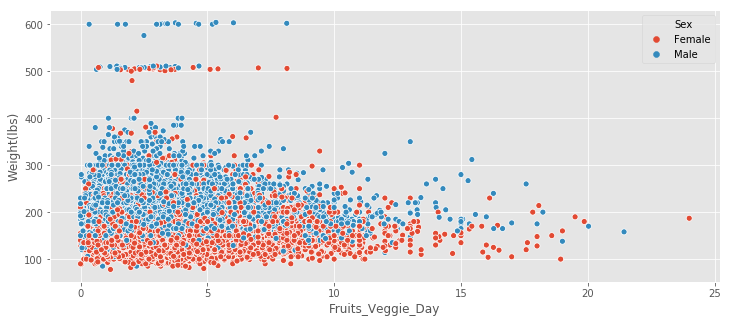

In [17]:
# Plotting the graph for Fruits and Veggie consumption againt weight.
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(x="Fruits_Veggie_Day" ,y="Weight(lbs)",  hue="Sex", data=behavior_data_sample, ax=ax)
fig.savefig("./Images/data_analysis/fruit_veggie_wt.png")

* Trend of Physical Activities with Weight

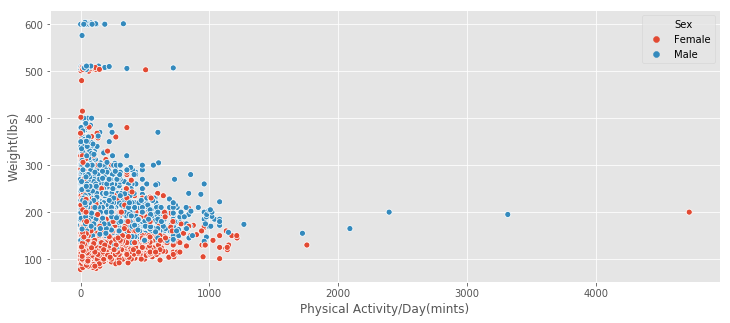

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(x="Physical Activity/Day(mints)",y="Weight(lbs)",  hue="Sex", data=behavior_data_sample)
    
fig.savefig("./Images/data_analysis/physical_wt.png")

* Trend of Drinking Habit with Weight

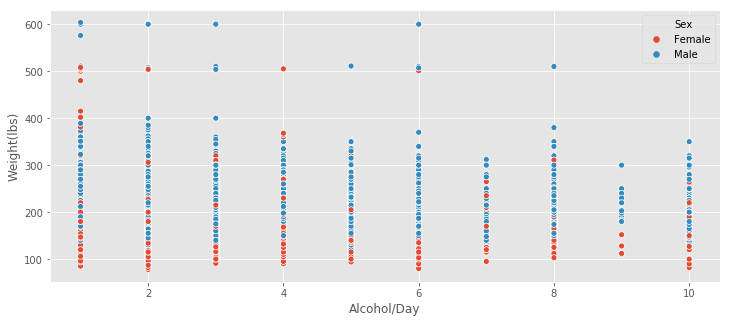

In [19]:
# Plotting the graph
fig, ax  = plt.subplots(figsize=(12, 5))
sns.scatterplot(x="Alcohol/Day",y="Weight(lbs)",  hue="Sex", data=behavior_data_sample)
   
fig.savefig("./Images/data_analysis/alcohol_wt.png")


* Trend of Smoking with Weight

In [20]:
# Gathering data for Smoking Vs Weight analysis.
behavior_data_sample_smoking = behavior_data_sample[behavior_data_sample["Smoking"].map(lambda x: x in ["Not at all", "Some days", "Every day"])]
behavior_data_sample_smoking.head()

,Sex,Fruits/Day,Weight(lbs),Alcohol/Day,Smoking,Physical Activity/Day(mints),Vegetables/Day,Fruits_Veggie_Day
36356,Female,0.84,140.0,2.0,Not at all,47.142857,1.67,2.51
7285,Male,1.03,165.0,1.0,Not at all,11.428571,3.84,4.87
13231,Female,1.13,205.0,6.0,Not at all,94.857143,2.24,3.37
13178,Female,2.00,150.0,1.0,Not at all,25.714286,1.46,3.46
29432,Male,2.00,106.0,6.0,Every day,40.000000,2.42,4.42


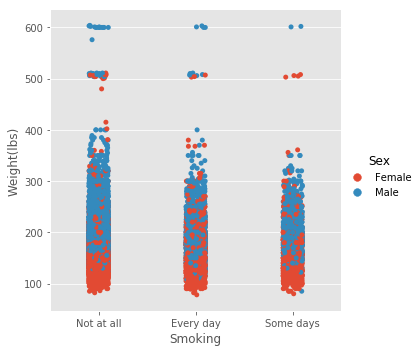

In [22]:
# Plotting the graph
sns.catplot(x="Smoking", y="Weight(lbs)" , hue = "Sex", data=behavior_data_sample_smoking)
fig.savefig("./Images/data_analysis/smoking_wt.png")


#### Analysis on Demographic Factors


* BMI Vs Diseases

In [23]:
bmi_total = behavior_data.groupby("BMI").count()[["Cancer", "Blood Pressure", "Cholestrol", "Heart Disease", "Diabetes"]]
cancer_by_bmi = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("BMI").count()["Cancer"] / bmi_total["Cancer"].sum() * 100
bp_by_bmi = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("BMI").count()["Blood Pressure"] / bmi_total["Blood Pressure"] * 100
chol_by_bmi = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("BMI").count()["Cholestrol"] / bmi_total["Cholestrol"] * 100
heart_by_bmi = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("BMI").count()["Heart Disease"] / bmi_total["Heart Disease"] * 100
diabetes_by_bmi = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("BMI").count()["Diabetes"] / bmi_total["Diabetes"] * 100
bmis = [cancer_by_bmi, bp_by_bmi, chol_by_bmi , heart_by_bmi, diabetes_by_bmi]
bmi_final = reduce(lambda left,right: pd.merge(left,right,on='BMI'), bmis)
bmi_final = bmi_final.reindex(["Underweight", "Normal Weight", "Overweight", "Obese"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
bmi_final_formatted = bmi_final.applymap(lambda x: f'{x: .2f}%')
bmi_final_formatted

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
BMI,,,,,
Underweight,0.14%,28.01%,25.16%,4.43%,3.96%
Normal Weight,3.72%,30.88%,35.06%,4.43%,5.14%
Overweight,4.47%,44.07%,46.67%,6.53%,9.67%
Obese,2.50%,55.55%,49.85%,7.96%,18.42%


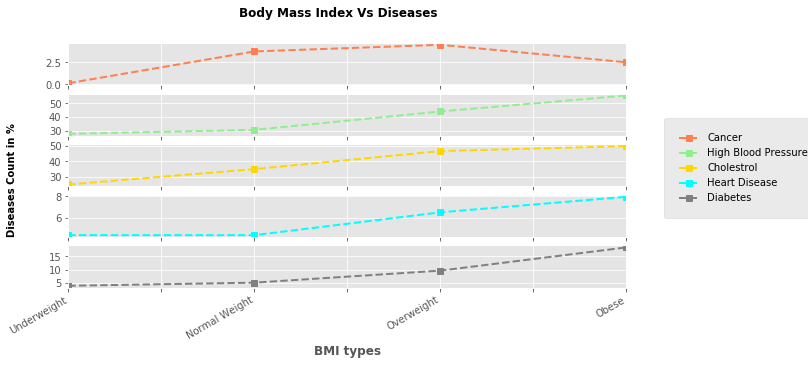

In [24]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 5) )
p1 = bmi_final.plot(ax=ax, subplots=True , sharex=True, colors = color_values, legend=False, marker = "s", ls= "--", lw=2)
plt.xlabel("BMI types" ,fontweight = "bold", fontsize="large")
fig.suptitle("Body Mass Index Vs Diseases", fontweight="bold", fontsize="large")
plt.figlegend(labels = bmi_final.columns , loc='best',  bbox_to_anchor=(1.15,  0.7) ,borderpad=1.5 )
fig.text(0.04, 0.5, 'Diseases Count in %', va='center', rotation='vertical', fontweight="bold")
fig.savefig("./Images/data_analysis/bmi_diseases.png")
plt.show()



* Education Vs Diseases

In [25]:
# Grouping by Education and extracting various disease types
edu_total = behavior_data.groupby("Education").count()[["Cancer", "Blood Pressure", "Cholestrol", "Heart Disease", "Diabetes"]]

# Calculating percentage values for each disease category.
cancer_by_education = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Education").count()["Cancer"] / edu_total["Cancer"].sum() * 100
bp_by_education = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Education").count()["Blood Pressure"] / edu_total["Blood Pressure"] * 100
chol_by_education = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Education").count()["Cholestrol"] / edu_total["Cholestrol"] * 100
heart_by_education = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Education").count()["Heart Disease"] / edu_total["Heart Disease"] * 100
diabetes_by_education = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Education").count()["Diabetes"] / edu_total["Diabetes"] * 100

# Creating a list of all tables to be merged
edus = [cancer_by_education, bp_by_education, chol_by_education , heart_by_education, diabetes_by_education] 

# Merging tables and re-indexing 
education_final = reduce(lambda left,right: pd.merge(left,right,on='Education'), edus)
education_final = education_final.reindex(["No School", "Elementary", "Junior High", "High School", "College 3yrs" ,"College 4yrs"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
education_final_formatted = education_final.applymap(lambda x: f'{x: .3f}%')
education_final_formatted

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
Education,,,,,
No School,0.004%,46.667%,40.000%,6.667%,13.333%
Elementary,0.075%,54.381%,52.835%,7.990%,21.134%
Junior High,0.231%,51.774%,46.705%,8.255%,14.410%
High School,2.326%,46.309%,44.453%,6.518%,11.593%
College 3yrs,3.049%,42.456%,42.139%,6.088%,10.867%
College 4yrs,5.139%,39.816%,43.435%,5.902%,8.943%


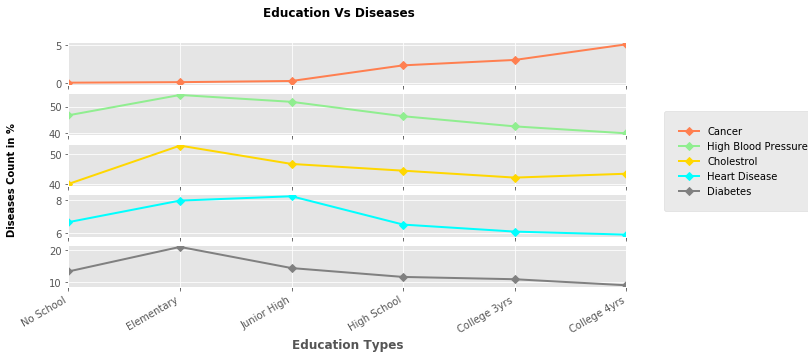

In [26]:
# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 5))
p1 = education_final.plot(ax=ax, subplots=True , sharex=True, colors = color_values, legend=False ,marker ="D", ls="-" ,lw=2)
plt.xlabel("Education Types" ,fontweight = "bold", fontsize="large")
fig.suptitle("Education Vs Diseases", fontweight="bold", fontsize="large")
plt.figlegend(labels = education_final.columns , loc='best', bbox_to_anchor=(1.15,  0.7) ,borderpad=1.5)
fig.text(0.04, 0.5, 'Diseases Count in %', va='center', rotation='vertical', fontweight="bold")
fig.savefig("./Images/data_analysis/education_diseases.png")
plt.show()

* Diseases Trend in States.

In [27]:
# Gathering the data.
state_disease_all = behavior_data.groupby("State Code").count()["Cancer"] + \
                      behavior_data.groupby("State Code").count()["Blood Pressure"] + \
                      behavior_data.groupby("State Code").count()["Cholestrol"] + \
                      behavior_data.groupby("State Code").count()["Heart Disease"] + \
                      behavior_data.groupby("State Code").count()["Diabetes"]

state_disease_cancer  = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("State Code").count()["Cancer"]
state_disease_bp      = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("State Code").count()["Blood Pressure"]
state_disease_chol    = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("State Code").count()["Cholestrol"]
state_disease_heart   = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("State Code").count()["Heart Disease"]
state_disease_diabetes = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("State Code").count()["Diabetes"]

# Processing Data to calculate total disease percentage by states.
state_disease_yes = state_disease_cancer + state_disease_bp + state_disease_chol + state_disease_heart + state_disease_diabetes
state_disease_perc = round(state_disease_yes / state_disease_all  * 100,2).sort_values()
state_perc_top10 = state_disease_perc.head(10)
state_perc_least10 = state_disease_perc.tail(10)
state_disease_perc = pd.DataFrame(state_disease_perc, columns=["Total Disease %"])
print("Top 10 healthy States")
state_disease_perc.head(5)


Top 10 healthy States


,Total Disease %
State Code,
GU,17.86
VT,18.41
UT,19.44
CO,19.83
MN,20.26


In [28]:
print("Least 10 healthy States")
state_disease_perc.tail(5)


Least 10 healthy States


,Total Disease %
State Code,
MS,24.96
LA,25.26
MD,25.47
PR,25.97
AR,25.98


#### Top 10 Healthy States based on Reported Diseases on the map.

In [30]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_least10.index,
            z = state_perc_least10.values,
            locationmode = 'USA-states',
            text = state_perc_least10.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 
# And our layout dictionary with some more arguments:
layout = dict(title = 'Least 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/data_analysis/least_healthy_10.png')

#### Least 10 Healthy States based on Reported Diseases on the map.

In [31]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_top10.index,
            z = state_perc_top10.values,
            locationmode = 'USA-states',
            text = state_perc_top10.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 
# And our layout dictionary with some more arguments:
layout = dict(title = 'Top 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/data_analysis/top_healthy_10.png')

* All Habits Vs Diseases - State Wise

In [32]:
# Consolidating all habits related data with state level diseases percentages.
total_smoking_state = behavior_data.groupby("State Code").count()["Smoking"]
percentage_smoking_state = behavior_data[(behavior_data["Smoking"] =="Every day") |   (behavior_data["Smoking"] =="Some days")].groupby("State Code").count()["Smoking"] / total_smoking_state * 100
sts = [state_disease_perc, fruits_avg_state, weight_avg_state, vegg_avg_state, avg_physical_activity_state, avg_alcohol_state ,percentage_smoking_state]
state_final = reduce(lambda left,right: pd.merge(left,right,on='State Code'), sts).sort_values('Total Disease %', ascending=False).rename(columns={"Smoking" : "% Smoking"})

state_final.head()

,Total Disease %,Fruits/Day,Weight(lbs),Vegetables/Day,Physical Activity/Day(mints),Alcohol/Day,% Smoking
State Code,,,,,,,
AR,25.98,1.230981,181.065421,2.035093,80.585447,2.135514,32.710280
PR,25.97,1.117696,173.816754,1.918115,53.813762,3.712042,36.649215
MD,25.47,1.435925,177.947434,2.165133,69.470536,1.890538,20.593692
LA,25.26,1.153192,181.694836,2.079272,72.453052,2.246479,32.629108
MS,24.96,1.122629,181.606880,1.923464,67.480870,2.216216,38.574939


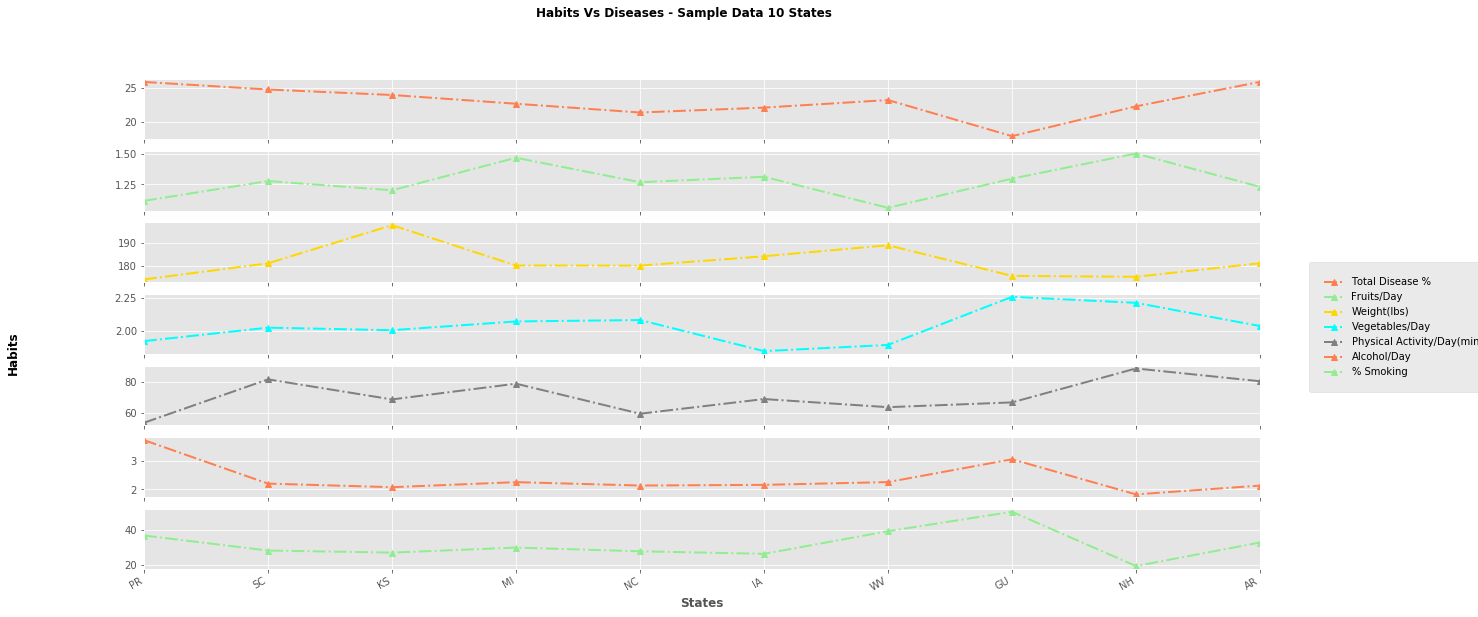

In [33]:
# Plotting the graph
fig, ax  = plt.subplots(figsize=( 20, 10))
p1 = state_final.sample(10).plot(ax=ax, subplots=True , sharex=True, colors = color_values, marker ="^", ls="-." ,lw=2 ,legend=False)
plt.xlabel("States", fontweight="bold", fontsize="large")
fig.suptitle("Habits Vs Diseases - Sample Data 10 States", fontweight="bold", fontsize="large")
fig.text(0.03, 0.5, 'Habits', va='center', rotation='vertical', fontweight="bold", fontsize="large")
plt.figlegend(labels = state_final.columns , loc='best', bbox_to_anchor=(1.05,  0.5) ,borderpad=1.5)
fig.savefig("./Images/data_analysis/states_habits_diseases.png")
plt.show()


* Education Vs Habits

In [34]:
# Creating the dataset
by_education = behavior_data.groupby("Education").mean()
fruits_avg_education = by_education["Fruits/Day"]
weight_avg_education = by_education["Weight(lbs)"]
vegg_avg_education = by_education["Vegetables/Day"]
avg_physical_activity_education = by_education["Physical Activity/Day(mints)"]
avg_alcohol_education = by_education["Alcohol/Day"]
total_smoking_count = behavior_data.groupby("Education").count()["Smoking"]
percentage_smoking_education = behavior_data[(behavior_data["Smoking"] =="Every day") |   (behavior_data["Smoking"] =="Some days")].groupby("Education").count()["Smoking"] / total_smoking_count * 100
habits_education_final = pd.DataFrame({"Fruits/Day" : fruits_avg_education,
                                      "Veggies/Day" : weight_avg_education,
                                      "PA/Day" : avg_physical_activity_education,
                                      "Alcohol/Day" : avg_alcohol_education,
                                      "% Smoking": percentage_smoking_education})

habits_education_final = habits_education_final.reindex(["No School", "Elementary", "Junior High", "High School", "College 3yrs" ,"College 4yrs"])
habits_education_final

,Fruits/Day,Veggies/Day,PA/Day,Alcohol/Day,% Smoking
Education,,,,,
No School,1.411333,193.266667,49.657143,2.600000,40.000000
Elementary,1.181469,181.123711,75.243741,2.564433,38.144330
Junior High,1.221933,181.688631,82.251578,2.580739,46.994931
High School,1.230523,181.663627,79.728752,2.304337,34.065498
College 3yrs,1.333054,180.355421,75.300922,2.125890,29.597512
College 4yrs,1.468905,177.607335,73.127355,1.905039,16.228427


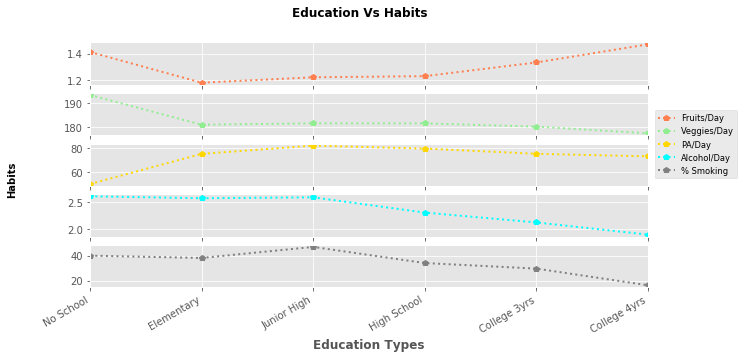

In [35]:
# Plotting the graph
fig, ax  = plt.subplots(figsize=( 10, 5), frameon=True)
p1 = habits_education_final.plot(ax=ax, subplots=True , sharex=True, colors = color_values,  legend=False, marker ="p", ls=":" ,lw=2)
plt.xlabel("Education Types", fontweight="bold", fontsize="large")
fig.suptitle("Education Vs Habits", fontweight="bold", fontsize="large")
plt.figlegend(labels = habits_education_final.columns , loc='best', bbox_to_anchor=(1.03,  0.7) , fontsize="small")
fig.text(0.01, 0.5, 'Habits', va='center', rotation='vertical', fontweight="bold")
fig.savefig("./Images/data_analysis/education_habits.png")
plt.show()


#### Age Groups Vs Disease Types

In [36]:
# Calculating the percentages
bp_per = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Age").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Age").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Age").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Age").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Age").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
age_disease_data = pd.DataFrame( {"High BP" : bp_per ,"Cancer": cancer_per , 
                                  "Cholestrol" : chol_per, "Heart" : heart_per , "Diabetes" : diabetes_per})
# Formatting the DataFrame
age_disease_data_formatted = age_disease_data.applymap(lambda x: f'{x: .2f}%')
age_disease_data_formatted.head()
age_disease_data1= age_disease_data.reset_index()

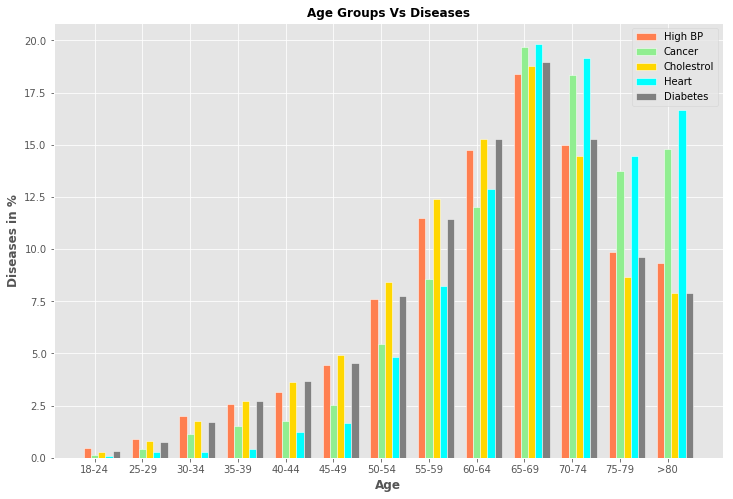

In [38]:
 #Build subplot with three rows and two columns
fig, ax  = plt.subplots(figsize=(12, 8))
#fig, ax = plt.subplots(figsize=(10,7)) 

# set width of bar
bar_width = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(age_disease_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3] 
r5 = [x + bar_width for x in r4]

# Make the plot
plt.bar(r1, age_disease_data["High BP"], color=color_values[0],  width=bar_width, edgecolor='white', label='High BP')
plt.bar(r2, age_disease_data["Cancer"], color=color_values[1] , width=bar_width, edgecolor='white', label='Cancer')
plt.bar(r3, age_disease_data["Cholestrol"], color=color_values[2], width=bar_width, edgecolor='white', label='Cholestrol')
plt.bar(r4, age_disease_data["Heart"], color=color_values[3], width=bar_width, edgecolor='white', label='Heart')
plt.bar(r5, age_disease_data["Diabetes"], color=color_values[4],  width=bar_width, edgecolor='white', label='Diabetes')

# Add xticks on the middle of the group bars
plt.xlabel("Age", fontweight='bold' , fontsize = 'large')
plt.xticks([r + bar_width for r in range(len(age_disease_data))], age_disease_data.index)
plt.title("Age Groups Vs Diseases", fontweight='bold', fontsize='large')
plt.ylabel("Diseases in %", fontweight='bold', fontsize = 'large')

 
# Create legend & Show graphic
lgnd = plt.legend()

fig.savefig("./Images/data_analysis/age_disease.png")


plt.show()

#### Gender Vs Disease Types

In [39]:
# Calculating the Percentages
bp_per_sex = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Sex").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per_sex = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Sex").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per_sex = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Sex").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per_sex = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Sex").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per_sex = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Sex").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
sex_disease_data = pd.DataFrame( {"High BP" : bp_per_sex ,"Cancer": cancer_per_sex , 
                                  "Cholestrol" : chol_per_sex, "Heart" : heart_per_sex , "Diabetes" : diabetes_per_sex})
# Formatting the DataFrame
sex_disease_data_formatted = sex_disease_data.applymap(lambda x: f'{x: .2f}%')
sex_disease_data_formatted

,High BP,Cancer,Cholestrol,Heart,Diabetes
Sex,,,,,
Female,41.76%,51.66%,44.54%,26.23%,38.39%
Male,58.24%,48.34%,55.46%,73.77%,61.61%


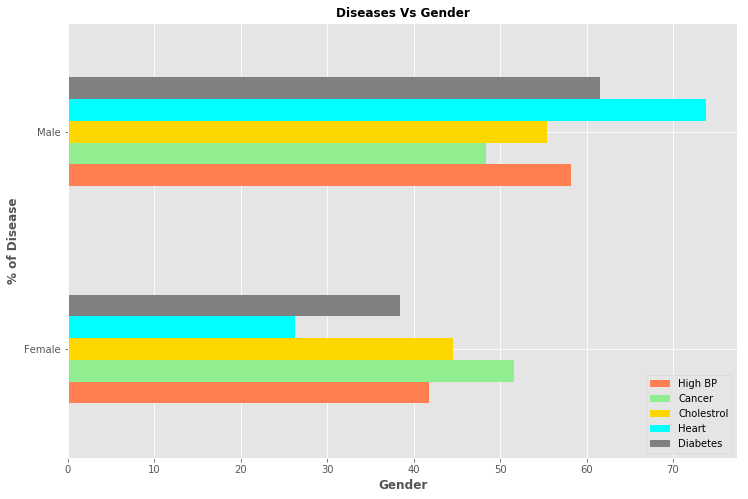

In [40]:
#Plot for Gender Vs Diseases
fig, ax  = plt.subplots(figsize=(12, 8))

sex_disease_data.plot(kind="barh", ax=ax, colors = color_values)

plt.title('Diseases Vs Gender', fontweight="bold", fontsize="large")
plt.xlabel('Gender',  fontweight="bold", fontsize="large")
plt.ylabel("% of Disease", fontweight="bold", fontsize="large")



fig.savefig("./Images/data_analysis/gender_disease.png")

plt.show()

#### Overall Country level Disease percentages based on total survey responses.

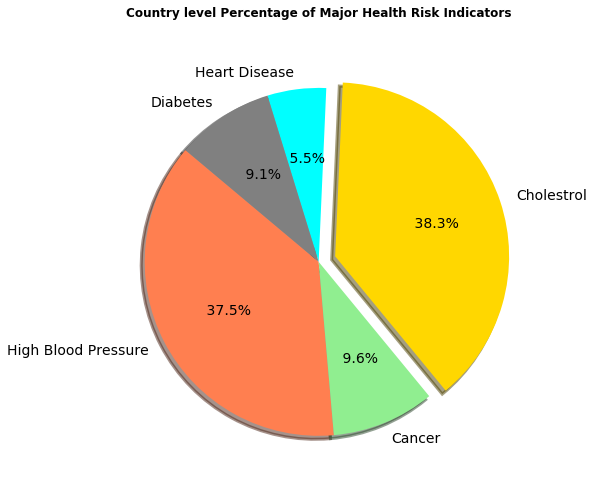

In [41]:
# Gathering Data and plotting Pie chart
fig, ax  = plt.subplots(figsize=(12, 8))

cancer_perc = cancer_count / total_respondents * 100
bp_perc =  bp_count / total_respondents * 100
chol_perc = chol_count / total_respondents * 100
heart_perc = heart_count / total_respondents * 100
diabetes_perc = diabetes_count / total_respondents * 100

disease_perc = [ bp_perc, cancer_perc, chol_perc , heart_perc , diabetes_perc]
pies = ["High Blood Pressure" ,"Cancer", "Cholestrol" , "Heart Disease", "Diabetes"]

explode = (0,0,0.1,0,0)
          
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(disease_perc, explode=explode, labels=pies, colors=color_values, autopct=lambda x: f'{x: .1f}%', 
        shadow=True, startangle=140, wedgeprops = {'linewidth': 3}, textprops={'fontsize': 14})

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
ttl = plt.title("Country level Percentage of Major Health Risk Indicators", fontweight="bold", fontsize="large")
ttl.set_position([.5, 1.05])

# Save an image of our chart and print the final product to the screen

fig.savefig("./Images/data_analysis/DieseasesPie.png")

plt.show()

#### State Vs Fruits and Vegetables Consumption

In [42]:
# groupy by states
groupped_data = behavior_data.groupby(["State"])
groupped_data.head(1)

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128.0,4.99980,20000-25000,...,3.000000e+01,Every day,2.0,Overweight,Yes,Yes,No,No,No,No
741,Alaska,AK,Female,Divorced,60-64,White only,College 3yrs,230.0,5.99976,35000-50000,...,4.000000e+01,Not at all,2.0,Obese,No,Yes,No,No,No,No
1242,Arizona,AZ,Male,Married,60-64,White only,College 4yrs,188.0,6.16642,>75000,...,2.485714e+02,Not at all,1.0,Normal Weight,No,Yes,No,No,No,No
2297,Arkansas,AR,Male,Married,65-69,White only,College 4yrs,168.0,5.66644,>75000,...,4.857143e+01,Not at all,3.0,Overweight,No,Yes,No,No,No,No
2725,California,CA,Female,Divorced,70-74,White only,College 3yrs,125.0,5.58311,35000-50000,...,4.200000e+01,Every day,2.0,Normal Weight,Yes,Yes,No,No,No,No
4192,Colorado,CO,Female,Never married,18-24,White only,High School,150.0,5.41645,>75000,...,9.000000e+01,Every day,3.0,Normal Weight,No,No,No,No,No,No
6181,Connecticut,CT,Female,Married,65-69,White only,College 4yrs,114.0,5.41645,50000-75000,...,1.114286e+02,Not at all,1.0,Normal Weight,Yes,No,No,No,No,No
8100,Delaware,DE,Male,Married,65-69,White only,College 4yrs,169.0,5.74977,>75000,...,1.200000e+02,Not at all,2.0,Normal Weight,No,No,No,No,No,No
8640,District of Columbia,DC,Male,A member of an unmarried couple,30-34,White only,College 4yrs,176.0,5.83310,>75000,...,4.714286e+01,Not at all,6.0,Overweight,Yes,No,No,No,No,No
9328,Florida,FL,Male,Divorced,25-29,Hispanic,College 3yrs,230.0,5.99976,35000-50000,...,1.028571e+02,Every day,4.0,Obese,Yes,Yes,No,No,No,No


In [43]:
# Re-using the dataframe already created.
fruit = fruits_avg_state.sort_values(ascending=False).head(10)
fruit

State Code
DC    1.578270
ME    1.547511
MA    1.521763
NY    1.517571
CT    1.503867
NH    1.499822
VT    1.474619
MI    1.465914
RI    1.453083
OR    1.448552
Name: Fruits/Day, dtype: float64

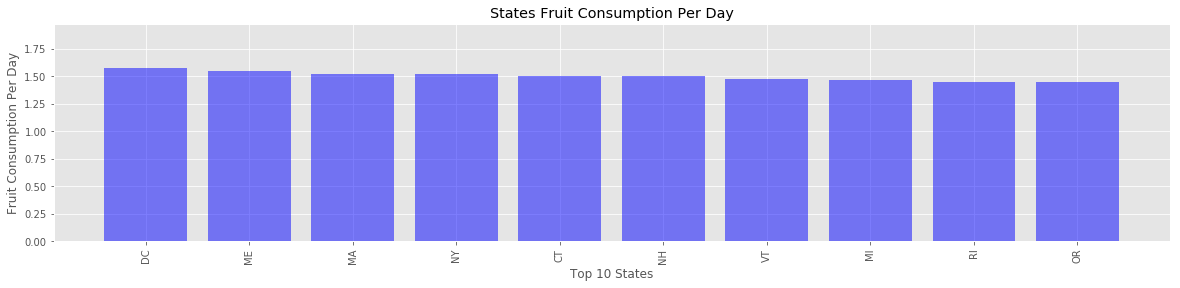

<Figure size 432x288 with 0 Axes>

In [44]:
# States vs Fruit Concumption Per Day
plt.figure(figsize=(20,4))
plt.ylim(0, max(fruit.values)+0.4)
plt.title("States Fruit Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Fruit Consumption Per Day")
plt.bar(fruit.index, fruit.values, color='b', alpha=0.5, align="center")
plt.xticks(fruit.index, rotation='vertical')
plt.show()
plt.savefig("./Images/data_analysis/Fruit_aconsumption.png")
plt.tight_layout()

In [45]:
# State vs vegtable cosumption per day
#fruit = state_fruit.sort_values(ascending=False).head(10)

#state_vegetable = groupped_data["Vegetables/Day"].mean()
vegatable =vegg_avg_state.sort_values(ascending=False).head(10)
vegatable

State Code
VT    2.320850
OR    2.315190
AK    2.310080
TX    2.296888
CA    2.288909
DC    2.282849
GA    2.282520
ME    2.280922
GU    2.261548
NV    2.259783
Name: Vegetables/Day, dtype: float64

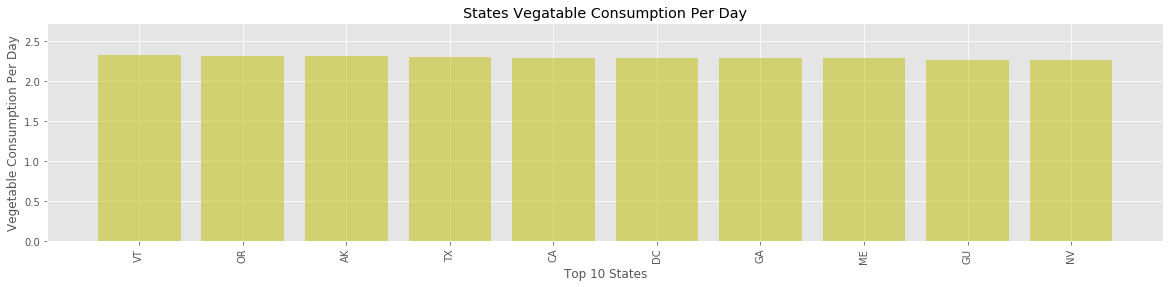

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(vegatable.values)+0.4)
plt.title("States Vegatable Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Vegetable Consumption Per Day")
plt.bar(vegatable.index, vegatable.values, color='y', alpha=0.5, align="center")
plt.xticks(vegatable.index, rotation='vertical')
plt.savefig("./Images/data_analysis/Vegatable_consumption.png")

plt.show()
plt.tight_layout()

#### State Vs Physical Activity Per Day

In [47]:
#Physical Activity vs. state
#state_physical = groupped_data["Physical Activity/Day(mints)"].mean()
avg_physical_activity_state.head()

State Code
AK    78.203023
AL    65.419318
AR    80.585447
AZ    86.034394
CA    73.998831
Name: Physical Activity/Day(mints), dtype: float64

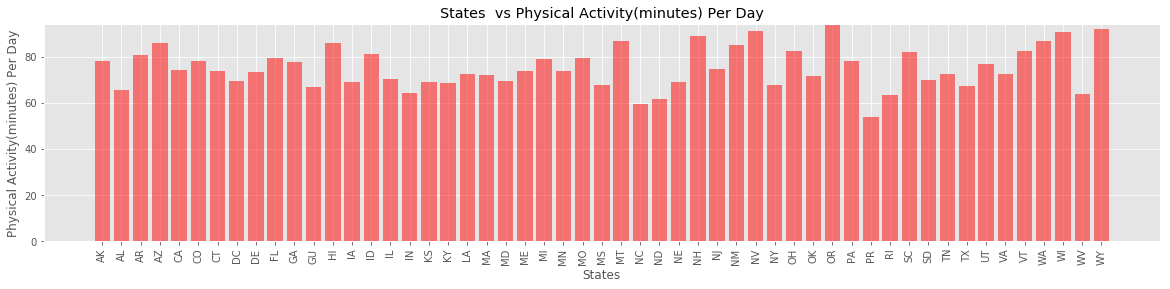

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(avg_physical_activity_state.values)+0.4)
plt.title("States  vs Physical Activity(minutes) Per Day")
plt.xlabel("States")
plt.ylabel("Physical Activity(minutes) Per Day")
plt.bar(avg_physical_activity_state.index, avg_physical_activity_state.values, color='r', alpha=0.5, align="center")
plt.xticks(avg_physical_activity_state.index, rotation='vertical')
plt.savefig("./Images/data_analysis/Pyhsical_activity.png")

plt.show()
plt.tight_layout()

In [49]:
# Re-using the dataframe generated earlier.
alcohol = avg_alcohol_state.sort_values(ascending=False).head(10)

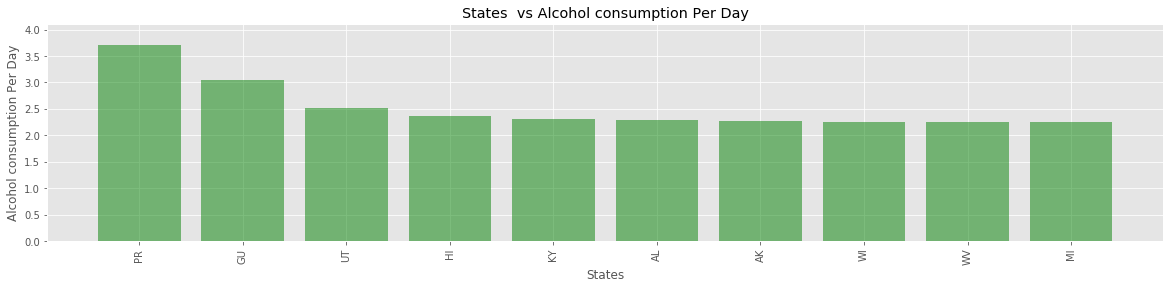

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(alcohol.values)+0.4)
plt.title("States  vs Alcohol consumption Per Day")
plt.xlabel("States")
plt.ylabel("Alcohol consumption Per Day")
plt.bar(alcohol.index, alcohol.values, color='g', alpha=0.5, align="center")
plt.xticks(alcohol.index, rotation='vertical')
plt.savefig("./Images/data_analysis/State_alcohol.png")
plt.show()
plt.tight_layout()

#### States Vs Smoking

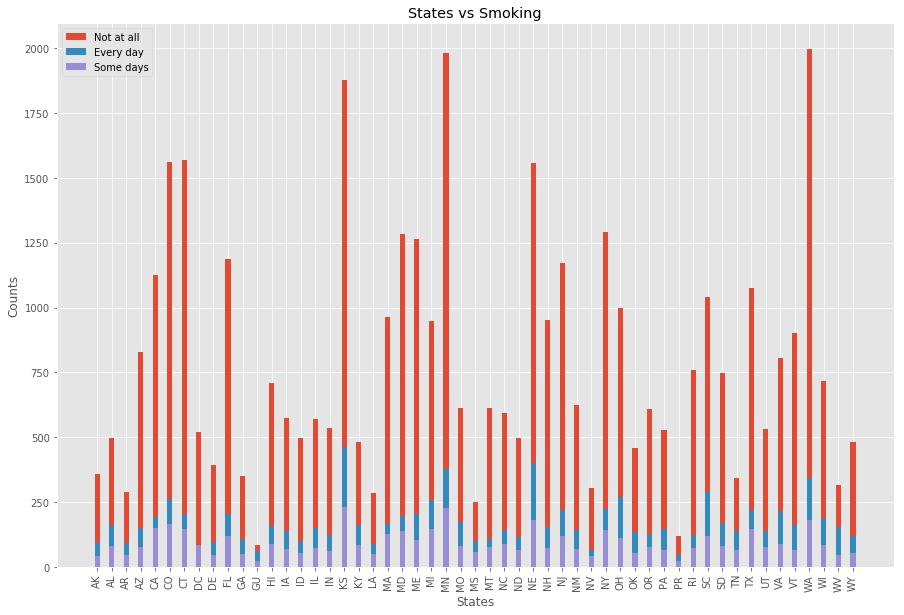

In [51]:
#Build subplot with three rows and two columns
N=5
fig = plt.figure(figsize=(15, 10))
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
not_at_all = behavior_data[behavior_data["Smoking"] == "Not at all"].groupby("State Code").count()["Smoking"]
every_day = behavior_data[behavior_data["Smoking"] == "Every day"].groupby("State Code").count()["Smoking"]
some_days = behavior_data[behavior_data["Smoking"] == "Some days"].groupby("State Code").count()["Smoking"]

p1 = plt.bar(not_at_all.index, not_at_all.values, width)
p2 = plt.bar(every_day.index, every_day.values, width)
p3 = plt.bar(some_days.index, some_days.values, width )

plt.legend((p1[0], p2[0] , p3[0]), ('Not at all', 'Every day', 'Some days'))
plt.title('States vs Smoking')
plt.xlabel('States')
plt.ylabel("Counts")
plt.xticks(avg_alcohol_state.index, rotation='vertical')
plt.savefig("./Images/data_analysis/Smoking_Per_States.png")
plt.show()